In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:

#reading data into csv
df_data = pd.read_csv("insurance_data.csv")

df_data.head()

df_data.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [3]:
##handling missing values using interpolation

##for numerical values
df = df_data.interpolate()

##for categorical values
df = df_data.fillna(df.mode().iloc[0])

df.isna().sum()



index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [4]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,43.0,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [10]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.097015,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.086239,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [5]:
#normalizing data

scaler = StandardScaler()
df[['age_T','bmi_T','bloodpressure_T','children_T','claim_T']] = scaler.fit_transform(df[['age','bmi','bloodpressure','children','claim']])

df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_T,bmi_T,bloodpressure_T,children_T,claim_T
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,0.081481,-1.223525,-0.276233,-0.907376,-1.002130
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,-1.272052,-0.093203,-0.626175,-0.907376,-1.001334
2,2,3,43.0,male,33.3,82,Yes,0,No,southeast,1135.94,0.442424,0.431004,-1.063604,-0.907376,-1.000968
3,3,4,43.0,male,33.7,80,No,0,No,northwest,1136.40,0.442424,0.496530,-1.238575,-0.907376,-1.000930
4,4,5,43.0,male,34.1,100,No,0,No,northwest,1137.01,0.442424,0.562056,0.511138,-0.907376,-1.000879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,0.532659,0.791396,-0.538690,-0.907376,3.459921
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,1.886193,1.217315,2.260852,-0.077421,3.743741
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,-0.730639,0.627582,-0.276233,1.582489,3.863553
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,-0.098990,-0.044059,1.036052,-0.907376,4.075982


C:\Users\Tesla Laptops\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tesla Laptops\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tesla Laptops\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tesla Laptops\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

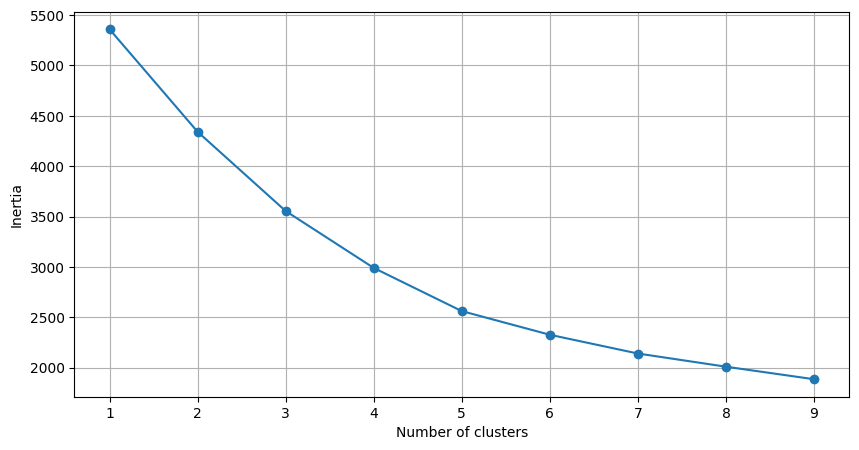

In [11]:
#IDENTIFYING NUMBER OF CLUSTERS

#creating function

def optimise_k_means(data , max_k):
    means = []
    inertias = []

    for k in range (1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #creating elbow plot

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()





optimise_k_means(df[['age_T','bmi_T','bloodpressure_T','children_T']],10)


In [13]:
#applying kmeans

kmeans = KMeans(n_clusters=5)

kmeans.fit(df[['age_T','bmi_T','bloodpressure_T','children_T']])

df['kmeans_5'] = kmeans.labels_

df



C:\Users\Tesla Laptops\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_T,bmi_T,bloodpressure_T,children_T,claim_T,kmeans_5
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,0.081481,-1.223525,-0.276233,-0.907376,-1.002130,2
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,-1.272052,-0.093203,-0.626175,-0.907376,-1.001334,2
2,2,3,43.0,male,33.3,82,Yes,0,No,southeast,1135.94,0.442424,0.431004,-1.063604,-0.907376,-1.000968,0
3,3,4,43.0,male,33.7,80,No,0,No,northwest,1136.40,0.442424,0.496530,-1.238575,-0.907376,-1.000930,0
4,4,5,43.0,male,34.1,100,No,0,No,northwest,1137.01,0.442424,0.562056,0.511138,-0.907376,-1.000879,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,0.532659,0.791396,-0.538690,-0.907376,3.459921,4
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,1.886193,1.217315,2.260852,-0.077421,3.743741,1
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,-0.730639,0.627582,-0.276233,1.582489,3.863553,3
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,-0.098990,-0.044059,1.036052,-0.907376,4.075982,1


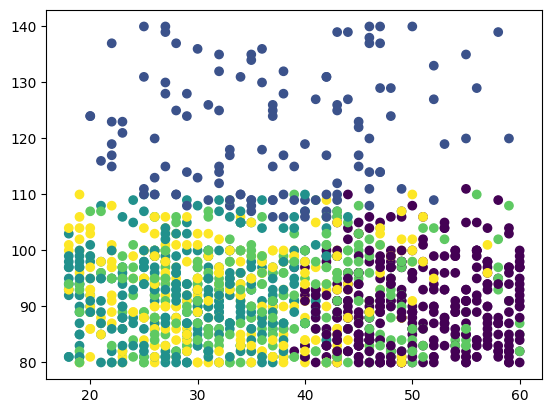

In [23]:
plt.scatter(x=df['age'], y=df['bloodpressure'], c=df['kmeans_5'])

plt.show()